<center><h1>DBSCAN</h1></center>

# 1. Introduction

**Density-Based Spatial Clustering of Applications with Noise (DBSCAN)** is a powerful unsupervised machine learning algorithm used for clustering tasks. Unlike partition-based methods such as **K-Means**, DBSCAN does not require the number of clusters to be specified in advance and can discover clusters of arbitrary shape. It groups together points that are closely packed together, while marking points that lie alone in low-density regions as **outliers**.

DBSCAN works based on two key parameters:

- `eps`: The maximum distance between two samples for them to be considered as in the same neighborhood.
- `min_samples`: The minimum number of points required to form a dense region.

This makes DBSCAN particularly effective for identifying **noise** and handling data with **varying densities**.


![DBSCAN](DBSCAN.jpg)

# 2. How Does DBSCAN Work?

DBSCAN (**Density-Based Spatial Clustering of Applications with Noise**) is a density-based clustering algorithm that groups together points that are close to each other based on a distance measurement and a minimum number of points. It is designed to discover clusters of arbitrary shape and to identify noise (outliers) in a dataset.

## Key Concepts

DBSCAN depends on two important parameters:

- **`eps` (ε)**: The maximum distance between two samples for them to be considered neighbors.
- **`min_samples`**: The minimum number of points required to form a dense region (including the core point itself).

Using these parameters, DBSCAN categorizes each point into one of the following types:

- **Core Point**: A point that has at least `min_samples` points (including itself) within a distance of `eps`. These points are in areas of high density.
- **Border Point**: A point that is within `eps` distance of a core point but does not itself have enough neighbors to be a core point.
- **Noise Point**: A point that is neither a core point nor a border point. It lies alone in a sparse region and is considered an outlier.

## Step-by-Step Algorithm

1. **Start with an unvisited point** in the dataset.
2. Mark the point as **visited**, and find all points within `eps` distance from it (its neighborhood).
3. - If the neighborhood contains **fewer than `min_samples`** points, mark it as **noise** (temporarily; it could later be changed to a border point).
   - If the neighborhood contains **at least `min_samples`** points, mark it as a **core point**, create a new cluster, and **expand the cluster**.
4. To expand the cluster:
   - Add all points in the neighborhood to a queue.
   - For each point in the queue:
     - If it has not been visited, mark it as visited and find its `eps`-neighborhood.
     - If it is a **core point**, add all its neighbors to the queue (even if they are already in the cluster, to ensure full density reachability).
     - If it is not a core point, it may still be a **border point** and is included in the current cluster.
5. Repeat until the queue is empty and all density-reachable points are added to the current cluster.
6. Continue the process with the next unvisited point until all points are either assigned to a cluster or labeled as noise.

## Summary of Core Ideas

- **Density Reachability**: A point *q* is density-reachable from *p* if there exists a chain of core points from *p* to *q*.
- **Density Connectivity**: Two points *p* and *q* are density-connected if there is a third point *o* such that both *p* and *q* are density-reachable from *o*.
- Clusters are formed by groups of density-connected points.

This density-based approach allows DBSCAN to identify clusters of arbitrary shape and to exclude outliers effectively, making it a robust choice for many real-world clustering problems.


# 3. About the Mall Customer Segmentation Dataset

### Context
This dataset is created solely for educational purposes, specifically to learn and understand customer segmentation concepts, also known as market basket analysis. The demonstration is typically done using unsupervised machine learning techniques, such as the KMeans Clustering Algorithm, in a simple and interpretable form.

### Content
You are owning a supermarket mall, and through membership cards, you have collected some basic data about your customers, including:

- Customer ID
- Age
- Gender
- Annual Income
- Spending Score

**Spending Score** is a value assigned to each customer based on defined parameters such as customer behavior and purchasing data.

### Problem Statement
As the mall owner, you want to better understand your customers — especially identifying those who can be easily converted (Target Customers). This understanding will help inform the marketing team so that they can develop strategies accordingly.

---

# 4. Steps to Apply DBSCAN Algorithm to Mall Customer Segmentation Dataset

### 4.1 Import Required Libraries

Import the necessary Python libraries for data loading, manipulation, visualization, and clustering.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA



### 4.2 Load the Dataset

Read the dataset into a pandas DataFrame and take a quick look at its structure.


In [2]:
# Load the dataset
df = pd.read_csv("Mall_Customers.csv")

# Display the first 5 rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 4.3 Data Preprocessing

- Check for missing values
- Encode categorical variables (e.g., Gender)
- Select relevant features for clustering (e.g., Annual Income and Spending Score)
- Feature scaling (e.g., StandardScaler or MinMaxScaler)


In [3]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Encode Gender: Male = 1, Female = 0
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Select relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


### 4.4 Exploratory Data Analysis (EDA)

- Visualize feature distributions
- Scatter plots to understand potential clustering structure


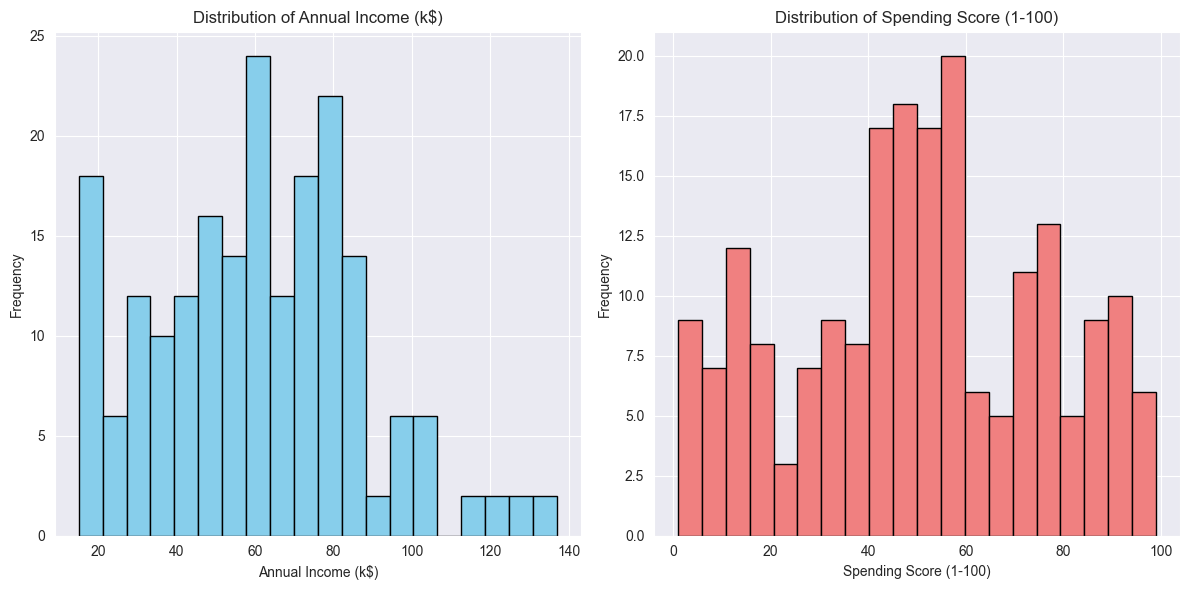

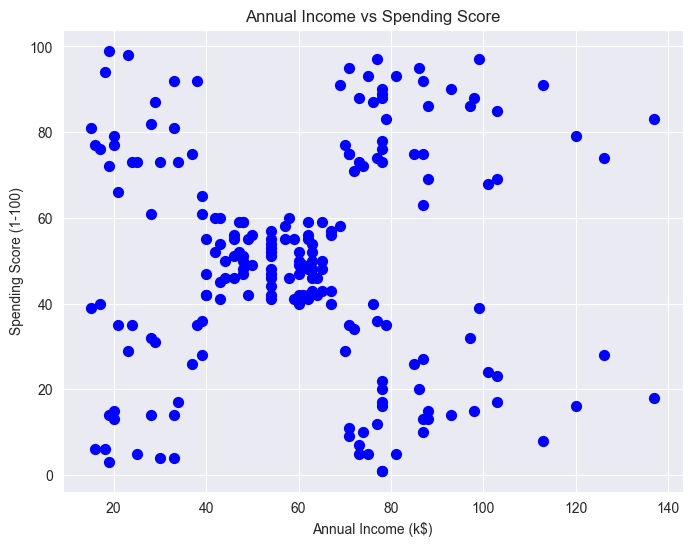

In [4]:
# Visualize Feature Distributions
plt.figure(figsize=(12, 6))

# Annual Income distribution
plt.subplot(1, 2, 1)
plt.hist(df['Annual Income (k$)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Annual Income (k$)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')

# Spending Score distribution
plt.subplot(1, 2, 2)
plt.hist(df['Spending Score (1-100)'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribution of Spending Score (1-100)')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Scatter plot to understand the potential clustering structure
plt.figure(figsize=(8, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c='blue', s=50)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


### 4.5 Apply DBSCAN Algorithm

- Import DBSCAN from `sklearn.cluster`
- Choose values for `eps` and `min_samples`
- Fit the model on the selected features


In [6]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN algorithm
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the model on the scaled features
dbscan.fit(X_scaled)

# Get the labels (clusters) assigned by DBSCAN
labels = dbscan.labels_

# Display the unique cluster labels
print("Unique cluster labels:", np.unique(labels))

Unique cluster labels: [-1  0  1]


### 4.6 Analyze the Clustering Results

- Count number of clusters and noise points
- Visualize the clusters using scatter plots
- Discuss findings and observations


Number of clusters: 2
Number of noise points: 8


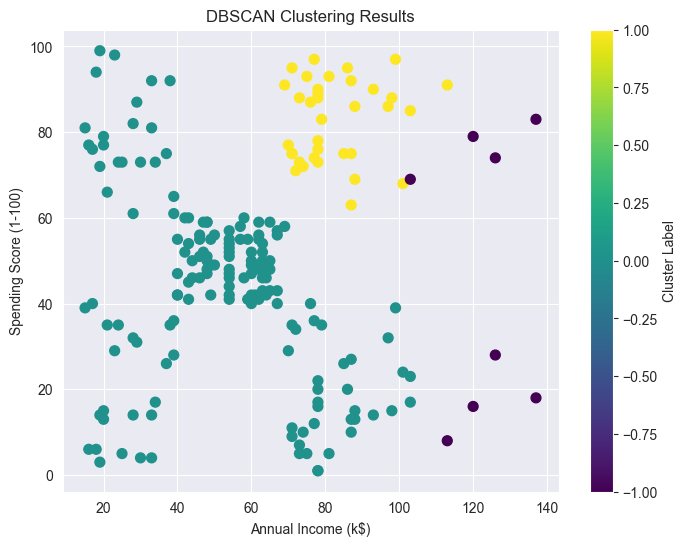

In [7]:
# Count the number of clusters and noise points
unique_labels = np.unique(labels)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
n_noise = list(labels).count(-1)

print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

# Scatter plot to visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster Label')
plt.show()


## Observations

### Cluster Separation
- DBSCAN identified two distinct groups based on density.
  - **Cluster 1**: More compact, showing consistent spending behavior among high-income individuals.
  - **Cluster 0**: More spread out, indicating greater variability in spending across a broader income range.

### Outliers
- Noise points are present:
  - At low incomes (20K-40K) with low Spending Scores (0-20).
  - At higher incomes (120K-140K) with varying Spending Scores (20-80).
- These outliers suggest individuals whose spending behavior doesn’t align with the identified clusters.

### Density-Based Clustering
- DBSCAN’s ability to handle noise and identify clusters of arbitrary shape is evident.
- It avoids forcing outliers into clusters, unlike methods like K-means.

## Implications

### Marketing Insights:
- **Cluster 1** (high income, high spending) could be targeted for luxury goods or premium services.
- **Cluster 0** might be suited for budget-friendly or value-driven products.

### Further Analysis:
- The noise points could be investigated to understand why these individuals deviate—possibly due to unique financial priorities or external factors.
